In [5]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
from time import sleep
import random
import time
from langdetect import DetectorFactory, detect
from langdetect.lang_detect_exception import LangDetectException

In [2]:
r = requests.get("https://www.amazon.in/Just-Herbs-Vegan-Forever-Creamy/product-reviews/B08VGPL1D9/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=")

print(r.url)
soup = BeautifulSoup(r.text, 'html.parser')
#print(soup.prettify())

https://www.amazon.in/Just-Herbs-Vegan-Forever-Creamy/product-reviews/B08VGPL1D9/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=


In [3]:
Review_Summary = []
Rating = []
def get_review(link, Review_Summary, Rating):
    pages = 0
    for j in range(1, 501):
        r = requests.get(link + str(j))

        soup = BeautifulSoup(r.text, 'html.parser')
        soup.prettify()
        Review_Title = soup.findAll("span", {"class" : "review-text-content"}) 
        Product_Rating = soup.findAll("i", {"class" : "review-rating"})
        for i in range(0,len(Review_Title)):
            if is_english(Review_Title[i].get_text()) == 'en':
                Review_Summary.append(Review_Title[i].get_text())
                k = int(Product_Rating[i+2].get_text()[0])
                if k < 3:
                    k = 0

                elif k > 3:
                    k=1
                Rating.append(k)
        time.sleep(random.randint(2, 4))
        
        pages += 1
        if pages%100 == 0:
            print(pages)
    Review_Summary[:] = [i.lstrip('                    ').rstrip('                    ') for i in Review_Summary]
    Review_Summary[:] = [i.lstrip('\n').rstrip('\n') for i in Review_Summary]
    df = pd.DataFrame()
    df["Review"] = Review_Summary
    df["pos or neg"] = Rating

    return df, Review_Summary, Rating
# print(Review_Summary)
# len(Rating)


In [181]:
# product_1, Review_Summary, Rating = get_review("https://www.amazon.in/Just-Herbs-Vegan-Forever-Creamy/product-reviews/B08VGPL1D9/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=", Review_Summary, Rating)
# product_2, Review_Summary, Rating = get_review("https://www.amazon.in/American-Tourister-AMT-SCH-03/product-reviews/B07CGSJNML/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=", Review_Summary, Rating)
# product_3, Review_Summary, Rating = get_review("https://www.amazon.in/product-reviews/B09N3ZNHTY/ref=cm_cr_arp_d_paging_btm_next_2/260-9797961-2343212?pd_rd_w=V83Nf&content-id=amzn1.sym.56cde3ad-3235-46d2-8a20-4773248e8b83&pf_rd_p=56cde3ad-3235-46d2-8a20-4773248e8b83&pf_rd_r=BMSP6CJ0FQ02QHJH0J8E&pd_rd_wg=Fip7f&pd_rd_r=0acf3fe0-f951-4125-a288-115a7361a3e0&pd_rd_i=B09N3ZNHTY&pageNumber=", Review_Summary, Rating)
# product_4, Review_Summary, Rating = get_review("https://www.amazon.in/Redmi-Activ-Coral-Green-Storage/product-reviews/B09GFLFMPS/ref=cm_cr_getr_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&filterByStar=two_star&pageNumber=", Review_Summary, Rating)
# product_5, Review_Summary, Rating = get_review("https://www.amazon.in/AmazonBasics-Extended-Gaming-Mouse-Black/product-reviews/B06X19FLTC/ref=cm_cr_arp_d_viewopt_rvwer?ie=UTF8&reviewerType=avp_only_reviews&pageNumber=", Review_Summary, Rating)    
# product_6, Review_Summary, Rating = get_review("https://www.amazon.in/Will-Teach-You-Excel-Co-Workers-ebook/product-reviews/B01DVS095I/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=", Review_Summary, Rating)
# product_7, Review_Summary, Rating = get_review("https://www.amazon.in/Monk-Who-Sold-His-Ferrari-ebook/product-reviews/B009FTAH3W/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=", Review_Summary, Rating)
# product_8, Review_Summary, Rating = get_review("https://www.amazon.in/Think-Grow-Rich-Illustrated-Napoleon-ebook/product-reviews/B079H2CMT2/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=", Review_Summary, Rating)
# product_9, Review_Summary, Rating = get_review("https://www.amazon.in/product-reviews/B00Q4RII52/ref=cm_cr_arp_d_paging_btm_next_2/260-9797961-2343212?pd_rd_w=VebEG&content-id=amzn1.sym.dcf9b861-ea71-4cd9-870f-f1d20747f687&pf_rd_p=dcf9b861-ea71-4cd9-870f-f1d20747f687&pf_rd_r=W41J1WZA07N1EGBKC0Z2&pd_rd_wg=nZAEj&pd_rd_r=d7256f10-4d50-458d-9038-6e86483941b3&pd_rd_i=B00Q4RII52&pageNumber=", Review_Summary, Rating)
# product_10, Review_Summary, Rating = get_review("https://www.amazon.in/product-reviews/B01LP0VI3G/ref=cm_cr_arp_d_paging_btm_next_2/260-9797961-2343212?pd_rd_w=ER953&content-id=amzn1.sym.56cde3ad-3235-46d2-8a20-4773248e8b83&pf_rd_p=56cde3ad-3235-46d2-8a20-4773248e8b83&pf_rd_r=W3F5GEW7GF1SD1V1Q7N4&pd_rd_wg=kmWVm&pd_rd_r=cdb6ab60-792f-4d74-a717-7345afeac33b&pd_rd_i=B01LP0VI3G&pageNumber=", Review_Summary, Rating)
# product_11, Review_Summary, Rating = get_review("https://www.amazon.in/Redmi-inches-Ready-L32M6-RA-Android/product-reviews/B09F9YQQ7B/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&reviewerType=all_reviews&filterByStar=one_star&pageNumber=", Review_Summary, Rating)


10
20
30
40
50
60
70
80


In [179]:
frames = [product_1, product_2, product_3, product_4, product_5, product_6, product_7, product_8, product_9, product_10, product_11]
DF = pd.concat(frames)

In [21]:
DF.to_csv('AmazonReviews.csv')

In [273]:
DF = pd.read_csv('AmazonReviews.csv')

In [274]:
DF['onezero'] = np.where(DF['pos or neg']==3, 1, DF['pos or neg'])
DF = DF.drop(['Unnamed: 0', "pos or neg"], axis=1)
DF

,Review,lang,onezero
0,I've got its kindle edition that's why unable ...,en,1
1,The book was in good condition,en,1
2,Nice Book but bad paper quality 🥺,en,1
3,Ideal for childern,en,1
4,The book gives a practical way to achieve rich...,en,1
...,...,...,...
22529,Horrible tv. Sound quality is the worst. Never...,en,0
22530,Third class TV. Bugdet TV good for people who ...,en,0
22531,"TV is good, but charging for installation",en,0
22532,Tv defective de diya and replace bhi nahi kr r...,en,0


In [275]:
DF = DF[DF.Review != '']
DF = DF[DF.Review.notnull()]
DF

,Review,lang,onezero
0,I've got its kindle edition that's why unable ...,en,1
1,The book was in good condition,en,1
2,Nice Book but bad paper quality 🥺,en,1
3,Ideal for childern,en,1
4,The book gives a practical way to achieve rich...,en,1
...,...,...,...
22529,Horrible tv. Sound quality is the worst. Never...,en,0
22530,Third class TV. Bugdet TV good for people who ...,en,0
22531,"TV is good, but charging for installation",en,0
22532,Tv defective de diya and replace bhi nahi kr r...,en,0


In [6]:
DetectorFactory.seed = 0
def is_english(text):
    try:
        return detect(text)
    except:
        return None

In [11]:
r = []
for i in DF["Review"]:
    r.append(is_english(i))


In [121]:
p = DF[DF["onezero"]==0]
p

,Review,lang,onezero
40,Its a good read but little bit slow in the beg...,en,0
42,Content in book is good but difficult to under...,en,0
44,"Yes, the book is good but it isn't suitable fo...",en,0
45,"Good one, but the same content could be found ...",en,0
47,Writer is over focussed on money instead of hu...,en,0
...,...,...,...
22529,Horrible tv. Sound quality is the worst. Never...,en,0
22530,Third class TV. Bugdet TV good for people who ...,en,0
22531,"TV is good, but charging for installation",en,0
22532,Tv defective de diya and replace bhi nahi kr r...,en,0


In [10]:
count = sum(map(lambda x : x != 'en', r))
count

In [296]:
r = pd.DataFrame(r)
r = r.rename(columns={0: "a"})
r[r['a'] == 'en']
DF["lang"] = r
DF = DF[DF["lang"] == 'en']
DF

,Review,pos or neg,lang
0,I've got its kindle edition that's why unable ...,1,en
1,The book was in good condition,1,en
2,Nice Book but bad paper quality 🥺,1,en
3,Ideal for childern,1,en
4,The book gives a practical way to achieve rich...,1,en
...,...,...,...
28236,Horrible tv. Sound quality is the worst. Never...,0,en
28237,Third class TV. Bugdet TV good for people who ...,0,en
28238,"TV is good, but charging for installation",0,en
28239,Tv defective de diya and replace bhi nahi kr r...,0,en


In [239]:
pd.set_option('display.max_rows', 10)
b = DF[(DF['Review'].str.contains('❤'))]
b.values.tolist()


[['Very Nice book at a cheap price Everyone should buy this ❤️😊',
  'en',
  1,
  'very nice book at a cheap price everyone should buy this ❤️😊'],
 ['The binding,print as well as the cover is beautiful ❤️',
  'en',
  1,
  'the binding,print as well as the cover is beautiful ❤️'],
 ['The media could not be loaded.\n                \n\n\n\n\xa0One of the best self help book❤️❤️❤️',
  'en',
  1,
  'the media could not be loaded. one of the best self help book❤️❤️❤️'],
 ['Its a really amazing book ❤️ worth it must buy',
  'en',
  1,
  'its a really amazing book ❤️ worth it must buy'],
 ['THIS BOOK HAS ITS OWN SECRETWHICH HELPS YOU TO REACH YOUR DESIRED GOALS......MUST READ THIS BOOK !!!Author Napoleon hill Done the Perfectly ❤️',
  'en',
  1,
  'this book has its own secretwhich helps you to reach your desired goals......must read this book !!!author napoleon hill done the perfectly ❤️'],
 ['Good Book. Must read ❤️', 'en', 1, 'good book. must read ❤️'],
 ['Feeling rich , not with a paper mo

In [875]:
# DF.reset_index(drop=True, inplace = True)
# pd.set_option('display.max_rows', 10)

DF

,Review,lang,onezero,short_str,new_reviews,cleanreviews,rmystopwords
0,I've got its kindle edition that's why unable ...,en,1,I've got its kindle edition that's why unable ...,i've got its kindle edition that's why unable ...,got kindle edition unable,get kindle edition unable
1,The book was in good condition,en,1,The book was in good condition,the book was in good condition,good condition,good condition
2,Nice Book but bad paper quality 🥺,en,1,Nice Book but bad paper quality 🥺,nice book but bad paper quality 🥺,nice bad paper quality pleading_face,nice bad paper quality pleading_face
3,Ideal for childern,en,1,Ideal for childern,ideal for childern,ideal childern,ideal childern
4,The book gives a practical way to achieve rich...,en,1,The book gives a practical way to achieve rich...,the book gives a practical way to achieve riches.,gives practical way achieve riches,give practical way achieve rich
...,...,...,...,...,...,...,...
22529,Horrible tv. Sound quality is the worst. Never...,en,0,Horrible tv. Sound quality is the worst. Never...,horrible tv. sound quality is the worst. never...,horrible tv quality worst never rec,horrible tv quality worst never rec
22530,Third class TV. Bugdet TV good for people who ...,en,0,Third class TV. Bugdet TV good for people who ...,third class tv. bugdet tv good for people who has,third class tv bugdet tv good people,third class tv bugdet tv good people
22531,"TV is good, but charging for installation",en,0,"TV is good, but charging for installation","tv is good, but charging for installation",tv good charging installation,tv good charge installation
22532,Tv defective de diya and replace bhi nahi kr r...,en,0,Tv defective de diya and replace bhi nahi kr r...,tv defective de diya and replace bhi nahi kr rahe,tv defective de diya replace bhi nahi kr rahe,tv defective de diya replace bhi nahi kr rahe


In [60]:
DF[DF['onezero']==0].count

<bound method DataFrame.count of                                                   Review lang  onezero
40     Its a good read but little bit slow in the beg...   en        0
42     Content in book is good but difficult to under...   en        0
44     Yes, the book is good but it isn't suitable fo...   en        0
45     Good one, but the same content could be found ...   en        0
47     Writer is over focussed on money instead of hu...   en        0
...                                                  ...  ...      ...
22529  Horrible tv. Sound quality is the worst. Never...   en        0
22530  Third class TV. Bugdet TV good for people who ...   en        0
22531         TV is good,  but charging for installation   en        0
22532  Tv defective de diya and replace bhi nahi kr r...   en        0
22533  The service was very bad, I have never seems l...   en        0

[4768 rows x 3 columns]>

## preparing dataset

In [279]:
DF['Review'].str.len().value_counts()[:40]
DF['short_str'] = DF['Review'].str.slice(0,50)
DF

C:\Users\bkmno\AppData\Local\Temp/ipykernel_6224/3281702768.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  DF['Review'].str.len().value_counts()[:40]


,Review,lang,onezero,short_str
0,I've got its kindle edition that's why unable ...,en,1,I've got its kindle edition that's why unable ...
1,The book was in good condition,en,1,The book was in good condition
2,Nice Book but bad paper quality 🥺,en,1,Nice Book but bad paper quality 🥺
3,Ideal for childern,en,1,Ideal for childern
4,The book gives a practical way to achieve rich...,en,1,The book gives a practical way to achieve rich...
...,...,...,...,...
22529,Horrible tv. Sound quality is the worst. Never...,en,0,Horrible tv. Sound quality is the worst. Never...
22530,Third class TV. Bugdet TV good for people who ...,en,0,Third class TV. Bugdet TV good for people who ...
22531,"TV is good, but charging for installation",en,0,"TV is good, but charging for installation"
22532,Tv defective de diya and replace bhi nahi kr r...,en,0,Tv defective de diya and replace bhi nahi kr r...


In [62]:
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# tokenizer = Tokenizer(oov_token="<OOV>")

In [8]:
import re
import pandas as pd
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import spacy

##### eng grammar, etc

In [224]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

C:\Users\bkmno\AppData\Roaming\Python\Python39\site-packages\spacy\language.py:1895: UserWarning: [W123] Argument disable with value ['parser', 'ner'] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  warnings.warn(


##### transform all reviews into lower case

In [280]:
DF['new_reviews'] = DF['short_str'].apply(lambda x: " ".join(x.lower() for x in x.split()))
DF['new_reviews'].head()


0    i've got its kindle edition that's why unable ...
1                       the book was in good condition
2                    nice book but bad paper quality 🥺
3                                   ideal for childern
4    the book gives a practical way to achieve riches.
Name: new_reviews, dtype: object

##### punctuation, emoji, etc :
[emoji image to words](https://stackoverflow.com/questions/57580288/how-to-replace-emoji-to-word-in-a-text)

[cleaning data](https://github.com/gunjannandy/twitter-sentiment-analysis/blob/master/twitter-sentiment-analysis.ipynb)

In [282]:
pd.set_option('display.max_rows', 10)
def extract_emojis(s):
    import emoji
    
    return ''.join(c for c in emoji.distinct_emoji_list(s))
emoji_lst = [extract_emojis(i) for i in DF.short_str.tolist()]
emoji_lst = list(filter(None, emoji_lst))
pd.Series(emoji_lst).value_counts()[:20]


👍     47
😍     20
😊     20
❤️    19
👌     15
      ..
🥰      3
😂      3
🥺      3
💰      3
📸      2
Length: 20, dtype: int64

In [291]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [292]:
def emoji(review):
    import emoji
    # image emoji
    review = re.sub(r"😢", " sad ", review)
    review = re.sub(r"😒", " bad ", review)
    review = re.sub(r"😕", " not confident ", review)
    review = re.sub(r"🤨", " not confident ", review)
    review = re.sub(r"☹️", " bad ", review)
    review = re.sub(r"🙄", " annoying ",  review)
    review = re.sub(r"😂", " laugh ", review)
    review = re.sub(r"❤️", " love ", review)
    review = re.sub(r"😍", " love ", review)
    review = re.sub(r"😭", " sad ", review)
    review = re.sub(r"😟", " sad ", review)
    review = re.sub(r"😞", " sad ", review)
    review = re.sub(r"👎", " bad ", review)
    review = re.sub(r"😓", " sad ", review)
    review = re.sub(r"☺️", " sad ", review)
    review = emoji.demojize(review, delimiters=("", ""))
    # Smile -- :), : ), :-), (:, ( :, (-:, :') , :O
    review = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O)', ' positiveemoji ', review)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    review = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' positiveemoji ', review)
    # Love -- <3, :*
    review = re.sub(r'(<3|:\*)', ' positiveemoji ', review)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-; , @-)
    review = re.sub(r'(;-?\)|;-?D|\(-?;|@-\))', ' positiveemoji ', review)
    # Sad -- :-(, : (, :(, ):, )-:, :-/ , :-|
    review = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\|)', ' negetiveemoji ', review)
    # Cry -- :,(, :'(, :"(
    review = re.sub(r'(:,\(|:\'\(|:"\()', ' negetiveemoji ', review)
    return review

In [293]:
import re

def process_tweet(review):
    review = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', review)   # Remove URLs
    review = re.sub(r"\d+", " ", str(review))                           # Removes all digits
    
    review = emoji(review)                                              # Replaces Emojis
    
    for word in review.split():
        if word.lower() in contractions:
            review = review.replace(word, contractions[word.lower()])   # Replaces contractions
    review = re.sub(r"[^\w\s]", " ", str(review))                       # Removes all punctuations
    review = re.sub(r'(.)\1+', r'\1\1', review)                         # Convert more than 2 letter repetitions to 2 letter
    review = re.sub(r"\s+", " ", str(review))                           # Replaces double spaces with single space    
    review = re.sub('&quot;'," ", review)                               # Remove (&quot;) 
    review = re.sub(r"\b[a-zA-Z]\b", "", str(review))                   # Removes all single characters
    return review

In [296]:
# DF['new_reviews'] = DF['new_reviews'].str.replace('[^\w\s]','')
# DF['new_reviews'].head()
DF['cleanreviews'] = np.vectorize(process_tweet)(DF["new_reviews"])

In [297]:
DF.head(30)

,Review,lang,onezero,short_str,new_reviews,cleanreviews
0,I've got its kindle edition that's why unable ...,en,1,I've got its kindle edition that's why unable ...,i've got its kindle edition that's why unable ...,have got its kindle edition that has that is ...
1,The book was in good condition,en,1,The book was in good condition,the book was in good condition,the book was in good condition
2,Nice Book but bad paper quality 🥺,en,1,Nice Book but bad paper quality 🥺,nice book but bad paper quality 🥺,nice book but bad paper quality pleading_face
3,Ideal for childern,en,1,Ideal for childern,ideal for childern,ideal for childern
4,The book gives a practical way to achieve rich...,en,1,The book gives a practical way to achieve rich...,the book gives a practical way to achieve riches.,the book gives practical way to achieve riches
...,...,...,...,...,...,...
25,Amazing book Every one must read,en,1,Amazing book Every one must read,amazing book every one must read,amazing book every one must read
26,"""I feel greatly indebted for the privilege of ...",en,1,"""I feel greatly indebted for the privilege of ...","""i feel greatly indebted for the privilege of ...",feel greatly indebted for the privilege of read
27,"I had expected more out of this book, when I s...",en,1,"I had expected more out of this book, when I s...","i had expected more out of this book, when i s...",had expected more out of this book when start
28,Think and Grow Rich…! By Napoleon Hill.A great...,en,1,Think and Grow Rich…! By Napoleon Hill.A great...,think and grow rich…! by napoleon hill.a great...,think and grow rich by napoleon hill great boo


In [298]:
tokenized_tweet = DF['cleanreviews'].apply(lambda x: x.split())
tokenized_tweet[2]

['nice', 'book', 'but', 'bad', 'paper', 'quality', 'pleading_face']

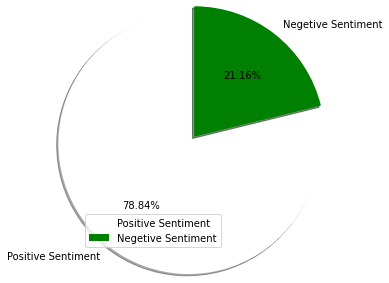

In [299]:
sentiments = ['Positive Sentiment', 'Negetive Sentiment'] 
slices = [(DF["onezero"] != 0).sum(), (DF["onezero"] == 0).sum()] 
colors = ['w', 'g'] 
plt.pie(slices, labels = sentiments, colors=colors, startangle=90, shadow = True,
        explode = (0, 0.1), radius = 1.5, autopct = '%1.2f%%') 
plt.legend()
plt.show() 

##### remove emojies using a function provided by Kamil Slowikowski
[link to Kamil Slowikowski's function](https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b)

In [102]:
# import re
# import sys

# # https://stackoverflow.com/a/49146722/330558
# def remove_emoji(string):
#     emoji_pattern = re.compile("["
#                            u"\U0001F600-\U0001F64F"  # emoticons
#                            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#                            u"\U0001F680-\U0001F6FF"  # transport & map symbols
#                            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                            u"\U00002702-\U000027B0"
#                            u"\U000024C2-\U0001F251"
#                            "]+", flags=re.UNICODE)
#     return emoji_pattern.sub(r'', string)
# DF['new_reviews'] = DF['new_reviews'].apply(lambda x: remove_emoji(x))
# DF.head()

[trying to remove with another](https://stackoverflow.com/questions/57514169/how-can-i-remove-emojis-from-a-dataframe)

In [103]:
# df = DF

In [104]:
# df = df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
# DF['new_reviews'] = df['new_reviews']
# DF.head()

In [105]:
# import emoji
# def extract_emojis(s):
#     return ''.join(c for c in s if c in emoji.UNICODE_EMOJI['en'])
# emoji_lst = [extract_emojis(i) for i in df.new_reviews.tolist()]
# emoji_lst = list(filter(None, emoji_lst))
# emoji_lst 

##### removing the stopwords

In [246]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bkmno\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
stop = stopwords.words('english')


In [300]:
my_stopwords = ['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'only',
 'own',
 'same',
 'so',
 'than',
 'too',
 's',
 'can',
 'will',
 'just',
 'should',
 "should've",
 'now',
 'd',
 'll',
 'm',
 'o',
 're',
 've',
 'y',
 'ain',
 'aren',
 'ma',
 'mightn',
 "mightn't",
 'mustn',
 "mustn't",
 'needn',
 "needn't",
 'shan',
 "shan't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't"]

In [302]:
pd.Series(" ".join(DF["cleanreviews"]).split()).value_counts()[:40]

is         7041
it         6453
the        6430
good       4688
and        4155
           ... 
must        725
working     725
its         702
really      694
loaded      681
Length: 40, dtype: int64

In [303]:
DF['cleanreviews'] = DF['cleanreviews'].apply(lambda x: " ".join(x for x in x.split() if x not in my_stopwords))
DF.head(30)

,Review,lang,onezero,short_str,new_reviews,cleanreviews
0,I've got its kindle edition that's why unable ...,en,1,I've got its kindle edition that's why unable ...,i've got its kindle edition that's why unable ...,got kindle edition unable
1,The book was in good condition,en,1,The book was in good condition,the book was in good condition,book good condition
2,Nice Book but bad paper quality 🥺,en,1,Nice Book but bad paper quality 🥺,nice book but bad paper quality 🥺,nice book but bad paper quality pleading_face
3,Ideal for childern,en,1,Ideal for childern,ideal for childern,ideal childern
4,The book gives a practical way to achieve rich...,en,1,The book gives a practical way to achieve rich...,the book gives a practical way to achieve riches.,book gives practical way achieve riches
...,...,...,...,...,...,...
25,Amazing book Every one must read,en,1,Amazing book Every one must read,amazing book every one must read,amazing book every one must read
26,"""I feel greatly indebted for the privilege of ...",en,1,"""I feel greatly indebted for the privilege of ...","""i feel greatly indebted for the privilege of ...",feel greatly indebted privilege read
27,"I had expected more out of this book, when I s...",en,1,"I had expected more out of this book, when I s...","i had expected more out of this book, when i s...",expected book start
28,Think and Grow Rich…! By Napoleon Hill.A great...,en,1,Think and Grow Rich…! By Napoleon Hill.A great...,think and grow rich…! by napoleon hill.a great...,think grow rich napoleon hill great boo


In [334]:
pd.Series(" ".join(DF["cleanreviews"]).split()).value_counts()[:20]

good       4688
not        3724
very       2540
quality    2431
read       1519
           ... 
price       547
buy         531
use         499
love        483
amazing     455
Length: 20, dtype: int64

In [330]:
my_stopwords = ['yoga', "amazon", "month", "one", "but", "product", "sound", "battery", "mat", "book", "media", "mouse", "pad", "months", "bat"]

In [331]:
DF['cleanreviews'] = DF['cleanreviews'].apply(lambda x: " ".join(x for x in x.split() if x not in my_stopwords))

In [647]:
DF

,Review,lang,onezero,short_str,new_reviews,cleanreviews
0,I've got its kindle edition that's why unable ...,en,1,I've got its kindle edition that's why unable ...,i've got its kindle edition that's why unable ...,got kindle edition unable
1,The book was in good condition,en,1,The book was in good condition,the book was in good condition,good condition
2,Nice Book but bad paper quality 🥺,en,1,Nice Book but bad paper quality 🥺,nice book but bad paper quality 🥺,nice bad paper quality pleading_face
3,Ideal for childern,en,1,Ideal for childern,ideal for childern,ideal childern
4,The book gives a practical way to achieve rich...,en,1,The book gives a practical way to achieve rich...,the book gives a practical way to achieve riches.,gives practical way achieve riches
...,...,...,...,...,...,...
22529,Horrible tv. Sound quality is the worst. Never...,en,0,Horrible tv. Sound quality is the worst. Never...,horrible tv. sound quality is the worst. never...,horrible tv quality worst never rec
22530,Third class TV. Bugdet TV good for people who ...,en,0,Third class TV. Bugdet TV good for people who ...,third class tv. bugdet tv good for people who has,third class tv bugdet tv good people
22531,"TV is good, but charging for installation",en,0,"TV is good, but charging for installation","tv is good, but charging for installation",tv good charging installation
22532,Tv defective de diya and replace bhi nahi kr r...,en,0,Tv defective de diya and replace bhi nahi kr r...,tv defective de diya and replace bhi nahi kr rahe,tv defective de diya replace bhi nahi kr rahe


##### lemmatization

In [883]:
def space(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])

DF['lemmatized']= DF['cleanreviews'].apply(space)
DF.head(20)

,Review,lang,onezero,short_str,new_reviews,cleanreviews,lemmatized
0,I've got its kindle edition that's why unable ...,en,1,I've got its kindle edition that's why unable ...,i've got its kindle edition that's why unable ...,got kindle edition unable,get kindle edition unable
1,The book was in good condition,en,1,The book was in good condition,the book was in good condition,good condition,good condition
2,Nice Book but bad paper quality 🥺,en,1,Nice Book but bad paper quality 🥺,nice book but bad paper quality 🥺,nice bad paper quality pleading_face,nice bad paper quality pleading_face
3,Ideal for childern,en,1,Ideal for childern,ideal for childern,ideal childern,ideal childern
4,The book gives a practical way to achieve rich...,en,1,The book gives a practical way to achieve rich...,the book gives a practical way to achieve riches.,gives practical way achieve riches,give practical way achieve rich
...,...,...,...,...,...,...,...
15,"I love this, life changing experience",en,1,"I love this, life changing experience","i love this, life changing experience",love life changing experience,love life change experience
16,The media could not be loaded.\n ...,en,1,The media could not be loaded.\n ...,the media could not be loaded.,could not loaded,could not load
17,Liked vivid description of internal forces pla...,en,1,Liked vivid description of internal forces pla...,liked vivid description of internal forces pla...,liked vivid description internal forces playing,like vivid description internal force play
18,It is a must-read book. I loved reading every ...,en,1,It is a must-read book. I loved reading every ...,it is a must-read book. i loved reading every ...,must read loved reading every page,must read love reading every page


In [651]:
 DF.loc[DF.cleanreviews.str.contains("https")]

,Review,lang,onezero,short_str,new_reviews,cleanreviews,rmystopwords
17836,"So first off, this one is on me... I really sh...",en,0,"So first off, this one is on me... I really sh...","so first off, this one is on me... i really sh...",first really,first really


In [254]:
# def remove_https(item):
#     #remove https links
#     item_1 = re.sub(r"[(+*)]\S*https?:\S*[(+*)]", "", item)
#     #remove https links with no brackets
#     item_2 = re.sub('http://\S+|https://\S+', " ", item_1)
#     #remove link markups []
#     #note that this will also remove comment fields with ["Delete"] 
#     item_3 = re.sub(r"[\(\[].*?[\)\]]", " ", item_2)
# #     #remove \ in don\'t
# #     item_4 = re.sub("[\"\']", "'", item_3)
#     return item_3

In [255]:
# df["lemmatized"] = [remove_https(x) for x in df.cleanreviews]

In [ ]:
20283

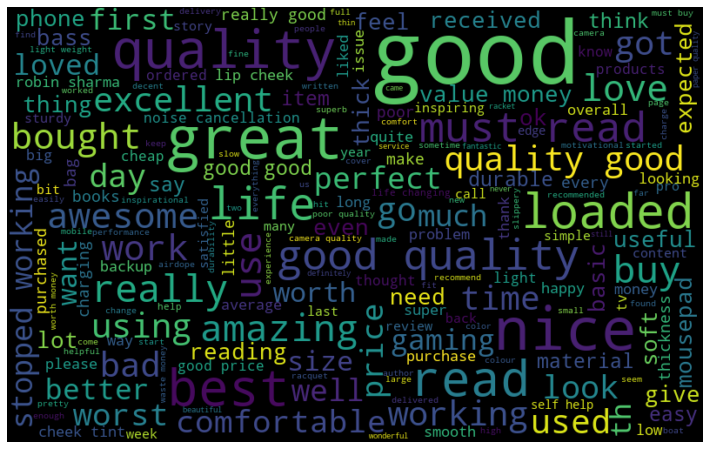

In [872]:
all_words = " ".join([sentence for sentence in DF['cleanreviews']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

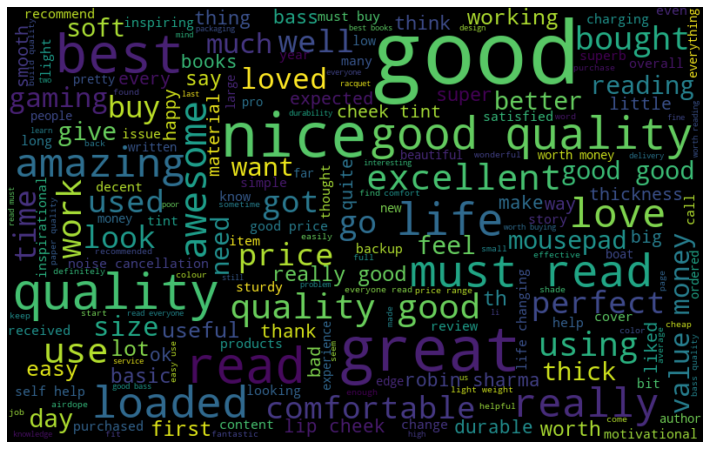

In [873]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in DF['cleanreviews'][DF['onezero']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

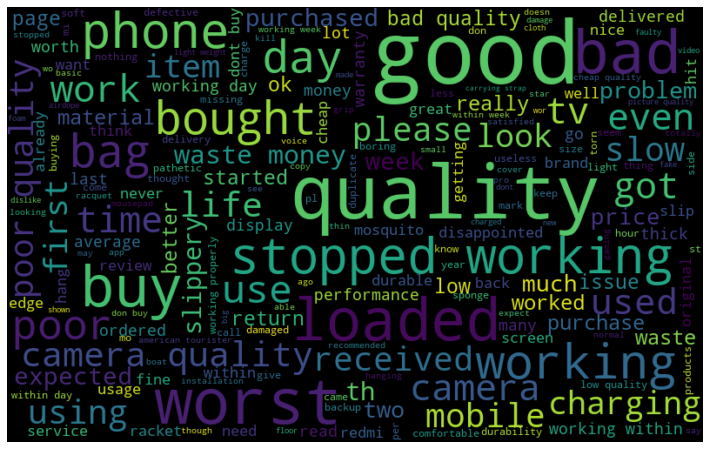

In [874]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in DF['cleanreviews'][DF['onezero']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [884]:
DF

,Review,lang,onezero,short_str,new_reviews,cleanreviews,lemmatized
0,I've got its kindle edition that's why unable ...,en,1,I've got its kindle edition that's why unable ...,i've got its kindle edition that's why unable ...,got kindle edition unable,get kindle edition unable
1,The book was in good condition,en,1,The book was in good condition,the book was in good condition,good condition,good condition
2,Nice Book but bad paper quality 🥺,en,1,Nice Book but bad paper quality 🥺,nice book but bad paper quality 🥺,nice bad paper quality pleading_face,nice bad paper quality pleading_face
3,Ideal for childern,en,1,Ideal for childern,ideal for childern,ideal childern,ideal childern
4,The book gives a practical way to achieve rich...,en,1,The book gives a practical way to achieve rich...,the book gives a practical way to achieve riches.,gives practical way achieve riches,give practical way achieve rich
...,...,...,...,...,...,...,...
22529,Horrible tv. Sound quality is the worst. Never...,en,0,Horrible tv. Sound quality is the worst. Never...,horrible tv. sound quality is the worst. never...,horrible tv quality worst never rec,horrible tv quality worst never rec
22530,Third class TV. Bugdet TV good for people who ...,en,0,Third class TV. Bugdet TV good for people who ...,third class tv. bugdet tv good for people who has,third class tv bugdet tv good people,third class tv bugdet tv good people
22531,"TV is good, but charging for installation",en,0,"TV is good, but charging for installation","tv is good, but charging for installation",tv good charging installation,tv good charge installation
22532,Tv defective de diya and replace bhi nahi kr r...,en,0,Tv defective de diya and replace bhi nahi kr r...,tv defective de diya and replace bhi nahi kr rahe,tv defective de diya replace bhi nahi kr rahe,tv defective de diya replace bhi nahi kr rahe


In [869]:
# DFtest = DF

In [870]:
# DFtest = DF.drop_duplicates(subset=['rmystopwords'])
# DFtest

In [871]:
# DFtest[DFtest['onezero']==0].count

# Models

In [840]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [851]:
x = DF['cleanreviews']
y = DF['onezero']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [852]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(X_train)
tfidf_test = vectorizer.transform(X_test)

# vectorizer = CountVectorizer() 
# tfidf = vectorizer.fit_transform(X_train)
# tfidf_test = vectorizer.transform(X_test)

# MultinomialNB

In [853]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(tfidf, y_train)

MultinomialNB()

In [854]:
model.score(tfidf_test, y_test)

0.851120479254493

In [855]:
# a = ["not good"]

# if model.predict(vectorizer.transform(a))[0] == 1:
#     print("positive")
# else:
#     print("negative")
b = ["bad","good", "not good", "awesome", "buy it", "dont buy it", "i like it", "I dont like it", "low quality", "high quality"]

a = model.predict(vectorizer.transform(b))
for i in range(len(a)):
    if a[i] == 1:
        print(b[i], "-", "positive")
    else:
        print(b[i], "-","negative")

bad - negative
good - positive
not good - positive
awesome - positive
buy it - positive
dont buy it - negative
i like it - positive
I dont like it - positive
low quality - positive
high quality - positive


# LogisticRegression

In [856]:
logistic = LogisticRegression(random_state=1, max_iter=200)
logistic.fit(tfidf, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [857]:
# y_train_predict, y_test_predict = logistic.predict(tfidf), logistic.predict(tfidf_test)
# y_train_predict
logistic.score(tfidf_test, y_test)

0.8719769247836698

In [858]:
# a = ["not good"]
# # logistic.predict(vectorizer.fit_transform(a))
# if logistic.predict(vectorizer.transform(a))[0] == 1:
#     print("positive")
# else:
#     print("negative")
b = ["bad","good", "not good", "awesome", "buy it", "dont buy it", "i like it", "I dont like it", "low quality", "high quality"]

a = logistic.predict(vectorizer.transform(b))
for i in range(len(a)):
    if a[i] == 1:
        print(b[i], "-", "positive")
    else:
        print(b[i], "-","negative")

bad - negative
good - positive
not good - negative
awesome - positive
buy it - negative
dont buy it - negative
i like it - positive
I dont like it - positive
low quality - negative
high quality - positive


# Perceptron

In [859]:
perceptron = Perceptron(random_state=1, max_iter=200)
perceptron.fit(tfidf, y_train)
perceptron.score(tfidf_test, y_test)

0.8329265586864877

In [880]:
b = ["bad","good", "not good", "awesome", "buy it", "dont buy it", "i like it", "I dont like it", "low quality", "high quality"]

a = perceptron.predict(vectorizer.transform(b))
for i in range(len(a)):
    if a[i] == 1:
        print(b[i], "-", "positive")
    else:
        print(b[i], "-","negative")

bad - negative
good - positive
not good - negative
awesome - positive
buy it - positive
dont buy it - negative
i like it - positive
I dont like it - negative
low quality - negative
high quality - positive


In [861]:
# bad - negative
# good - positive
# not good - negative
# awesome - positive
# buy it - positive
# dont buy it - negative
# i like it - positive
# I dont like it - negative
# low quality - negative
# high quality - positive


In [862]:
print("MultinomialNB: ", model.score(tfidf_test, y_test))
print("Logistic Regression: ", logistic.score(tfidf_test, y_test))
print("Perceptron: ", perceptron.score(tfidf_test, y_test))

MultinomialNB:  0.851120479254493
Logistic Regression:  0.8719769247836698
Perceptron:  0.8329265586864877
